In [1]:
import pandas as pd
from sqlalchemy import create_engine

# Kết nối PostgreSQL
DB_CONFIG = {
    'dbname': 'm5_data',
    'user': 'postgres',
    'password': 'H30012003h',
    'host': 'localhost',
    'port': '5432'
}
engine = create_engine(f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['password']}@{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['dbname']}")

# Truy vấn dữ liệu từ bảng sales_raw
query = """
SELECT date, item_id, store_id, state_id, sales, sell_price
FROM sales_raw
WHERE state_id = 'CA'
AND date BETWEEN '2013-01-01' AND '2016-05-22';
"""
sales_raw = pd.read_sql(query, engine)

# Ghép cat_id từ sales_train_validation.csv
sales_train = pd.read_csv('C:/Users/Ho Hau/Downloads/M5/data/raw/sales_train_validation.csv')
sales_train = sales_train[['item_id', 'cat_id']]
sales_raw = sales_raw.merge(sales_train, on='item_id', how='left')

# Chuyển đổi date thành định dạng datetime
sales_raw['date'] = pd.to_datetime(sales_raw['date'])

print("Dữ liệu đã được tải thành công!")
print(sales_raw.head())
print(f"sales_raw shape: {sales_raw.shape}")

Dữ liệu đã được tải thành công!
        date     item_id store_id state_id  sales  sell_price cat_id
0 2013-01-01  HOBBIES_1_     CA_1       CA      0        0.00    NaN
1 2013-01-01  HOBBIES_1_     CA_1       CA      1        3.97    NaN
2 2013-01-01  HOBBIES_1_     CA_1       CA      0        0.00    NaN
3 2013-01-01  HOBBIES_1_     CA_1       CA      0        4.34    NaN
4 2013-01-01  HOBBIES_1_     CA_1       CA      1        3.08    NaN
sales_raw shape: (14757160, 7)


In [2]:
# Tính tổng doanh số và doanh thu
sales_raw['revenue'] = sales_raw['sales'] * sales_raw['sell_price']
sales_by_store = sales_raw.groupby('store_id')['sales'].sum().reset_index()
revenue_by_store = sales_raw.groupby('store_id')['revenue'].sum().reset_index()
sales_by_category = sales_raw.groupby('cat_id')['sales'].sum().reset_index()
revenue_by_category = sales_raw.groupby('cat_id')['revenue'].sum().reset_index()

# So sánh chi tiết theo cửa hàng và chủ đề
sales_by_store_category = sales_raw.groupby(['store_id', 'cat_id'])['sales'].sum().unstack(fill_value=0)
revenue_by_store_category = sales_raw.groupby(['store_id', 'cat_id'])['revenue'].sum().unstack(fill_value=0)

print("Tổng doanh số theo cửa hàng:")
print(sales_by_store)
print("\nTổng doanh thu theo cửa hàng:")
print(revenue_by_store)
print("\nTổng doanh số theo chủ đề mặt hàng:")
print(sales_by_category)
print("\nTổng doanh thu theo chủ đề mặt hàng:")
print(revenue_by_category)
print("\nDoanh số theo cửa hàng và chủ đề mặt hàng:")
print(sales_by_store_category)
print("\nDoanh thu theo cửa hàng và chủ đề mặt hàng:")
print(revenue_by_store_category)

Tổng doanh số theo cửa hàng:
  store_id    sales
0     CA_1  5230991
1     CA_2  3826908
2     CA_3  7567647
3     CA_4  2837712

Tổng doanh thu theo cửa hàng:
  store_id      revenue
0     CA_1  15680193.86
1     CA_2  11933978.59
2     CA_3  22281157.83
3     CA_4   8639415.55

Tổng doanh số theo chủ đề mặt hàng:
Empty DataFrame
Columns: [cat_id, sales]
Index: []

Tổng doanh thu theo chủ đề mặt hàng:
Empty DataFrame
Columns: [cat_id, revenue]
Index: []

Doanh số theo cửa hàng và chủ đề mặt hàng:
Empty DataFrame
Columns: []
Index: []

Doanh thu theo cửa hàng và chủ đề mặt hàng:
Empty DataFrame
Columns: []
Index: []


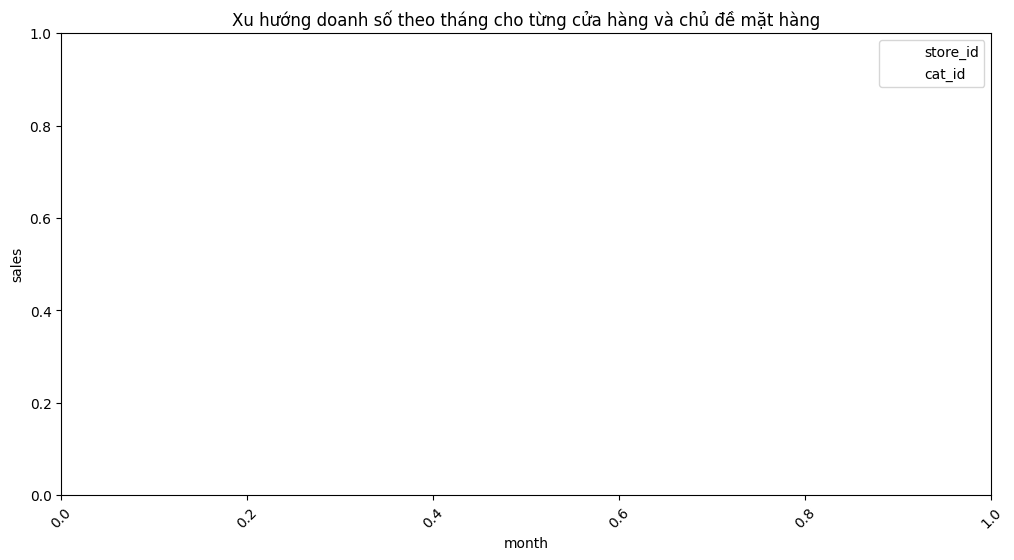

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính doanh số trung bình hàng tháng
sales_raw['month'] = sales_raw['date'].dt.to_period('M')
monthly_sales = sales_raw.groupby(['store_id', 'cat_id', 'month'])['sales'].sum().reset_index()

# Biểu đồ xu hướng
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month', y='sales', hue='store_id', style='cat_id')
plt.title("Xu hướng doanh số theo tháng cho từng cửa hàng và chủ đề mặt hàng")
plt.xticks(rotation=45)
plt.show()